In [80]:
import pandas as pd

In [81]:
demo = pd.read_csv('df_final_demo.txt')
demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [82]:
demo_duplicates = demo.duplicated()
demo_duplicates.sum()

0

In [83]:
print(demo.isnull().sum())

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64


In [84]:
print(demo.columns)

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')


In [85]:
demo = demo.rename(columns={'clnt_tenure_yr': 'tenure_year', 'clnt_tenure_mnth': 'tenure_month', 'clnt_age':'client_age', 'gendr':'gender','bal':'total_balance'})
demo

,client_id,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [86]:
demo['gender'].unique()

# make a dict

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [87]:
demo['gender'] = demo['gender'].replace(['X', 'U', 'nan'], 'undisclosed')
demo['gender'] = demo['gender'].fillna('undisclosed')

# Display the cleaned DataFrame
print("\nDataFrame after cleaning 'gender' column:")
print(demo)



DataFrame after cleaning 'gender' column:
       client_id  tenure_year  tenure_month  client_age       gender  \
0         836976          6.0          73.0        60.5  undisclosed   
1        2304905          7.0          94.0        58.0  undisclosed   
2        1439522          5.0          64.0        32.0  undisclosed   
3        1562045         16.0         198.0        49.0            M   
4        5126305         12.0         145.0        33.0            F   
...          ...          ...           ...         ...          ...   
70604    7993686          4.0          56.0        38.5  undisclosed   
70605    8981690         12.0         148.0        31.0            M   
70606     333913         16.0         198.0        61.5            F   
70607    1573142         21.0         255.0        68.0            M   
70608    5602139         21.0         254.0        59.5            F   

       num_accts  total_balance  calls_6_mnth  logons_6_mnth  
0            2.0       45105.

In [88]:
gender_counts = demo['gender'].value_counts()

# Get counts for 'F' and 'M'
count_f = gender_counts.get('F', 0)
count_m = gender_counts.get('M', 0)

# Display the counts
print(f"\nCount of 'F' in 'gender' column: {count_f}")
print(f"Count of 'M' in 'gender' column: {count_m}")


Count of 'F' in 'gender' column: 22746
Count of 'M' in 'gender' column: 23724


In [89]:
gender_counts = demo['gender'].value_counts()
count_unknown = gender_counts.get('unknown', 0)

# Alternatively, count using boolean indexing
count_unknown_alternative = (demo['gender'] == 'unknown').sum()

# Display the counts
print(f"\nCount of 'unknown' in 'gender' column: {count_unknown}")


Count of 'unknown' in 'gender' column: 0


In [90]:
demo['client_age'] = demo['client_age'].round(0).fillna(-1).astype(int)

# Display the DataFrame after rounding
print("\nDataFrame after rounding 'client_age':")
print(demo[['client_age']].head())


DataFrame after rounding 'client_age':
   client_age
0          60
1          58
2          32
3          49
4          33


In [91]:
# Fill NaN values before converting to int
cols_to_clean = ['tenure_year', 'tenure_month', 'calls_6_mnth', 'logons_6_mnth', 'num_accts', 'total_balance']
demo[cols_to_clean] = demo[cols_to_clean].round(0).fillna(-1).astype(int)

print("\nDataFrame after cleaning 'tenure_year', 'tenure_month', 'calls_6_mnth', 'logons_6_mnth', 'num_accts', 'total_balance' :")
print(demo)


DataFrame after cleaning 'tenure_year', 'tenure_month', 'calls_6_mnth', 'logons_6_mnth', 'num_accts', 'total_balance' :
       client_id  tenure_year  tenure_month  client_age       gender  \
0         836976            6            73          60  undisclosed   
1        2304905            7            94          58  undisclosed   
2        1439522            5            64          32  undisclosed   
3        1562045           16           198          49            M   
4        5126305           12           145          33            F   
...          ...          ...           ...         ...          ...   
70604    7993686            4            56          38  undisclosed   
70605    8981690           12           148          31            M   
70606     333913           16           198          62            F   
70607    1573142           21           255          68            M   
70608    5602139           21           254          60            F   

       num_acc

In [92]:
demo.nunique()

client_id        70609
tenure_year         55
tenure_month       483
client_age          83
gender               3
num_accts            9
total_balance    56924
calls_6_mnth         9
logons_6_mnth       10
dtype: int64

In [93]:
demo.head()

,client_id,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,undisclosed,2,45105,6,9
1,2304905,7,94,58,undisclosed,2,110860,6,9
2,1439522,5,64,32,undisclosed,2,52468,6,9
3,1562045,16,198,49,M,2,67455,3,6
4,5126305,12,145,33,F,2,103672,0,3


In [94]:
demo["gender"].value_counts()

gender
undisclosed    24139
M              23724
F              22746
Name: count, dtype: int64

In [95]:
demo['tenure_year'].value_counts().sort_values(ascending=True)

tenure_year
 62       1
 54       1
 45       1
 41       1
 52       2
 44       3
 49       4
 51       5
 46       5
 43       6
 47       6
 42       6
 50       8
 39       9
 55       9
 40       9
-1       14
 48      16
 38      33
 37      35
 36      36
 2       81
 35     102
 31     166
 34     175
 32     191
 33     206
 30     303
 29     309
 3      449
 25     484
 28     507
 27     632
 26     660
 24     846
 19    1153
 18    1206
 23    1279
 17    1373
 22    1492
 20    1580
 21    2257
 16    2714
 10    2775
 11    2920
 9     3357
 13    3607
 12    3631
 14    3646
 8     4045
 15    4564
 4     4687
 7     4955
 5     6955
 6     7092
Name: count, dtype: int64

In [96]:
mean_tnr_year = demo["tenure_year"].mean()
mean_tnr_year

12.05036185188857

In [97]:
median_tnr_year = demo["tenure_year"].median()
median_tnr_year

11.0

In [98]:
# Create a longevity metric:

demo['tenure_total_months'] = demo['tenure_year'] * 12 + demo['tenure_month']
demo.head()


,client_id,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth,tenure_total_months
0,836976,6,73,60,undisclosed,2,45105,6,9,145
1,2304905,7,94,58,undisclosed,2,110860,6,9,178
2,1439522,5,64,32,undisclosed,2,52468,6,9,124
3,1562045,16,198,49,M,2,67455,3,6,390
4,5126305,12,145,33,F,2,103672,0,3,289


In [99]:
# Simple analysis: correlation between age vs longevity

demo[['client_age', 'tenure_total_months']].corr()


,client_age,tenure_total_months
client_age,1.000000,0.310211
tenure_total_months,0.310211,1.000000


In [100]:
df_clean = demo[demo['tenure_total_months'] >= 0].copy()



In [101]:
print(df_clean['tenure_total_months'].describe())

count    70595.000000
mean       295.294766
std        164.507881
min         57.000000
25%        154.000000
50%        268.000000
75%        384.000000
max       1493.000000
Name: tenure_total_months, dtype: float64


In [102]:
df_clean.head()

,client_id,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth,tenure_total_months
0,836976,6,73,60,undisclosed,2,45105,6,9,145
1,2304905,7,94,58,undisclosed,2,110860,6,9,178
2,1439522,5,64,32,undisclosed,2,52468,6,9,124
3,1562045,16,198,49,M,2,67455,3,6,390
4,5126305,12,145,33,F,2,103672,0,3,289


In [103]:
# classify clients as new or ancient, young or old

df_clean['tenure_group'] = pd.cut(df_clean['tenure_total_months'], bins=[0, 150, 300, float('inf')], labels=['new', 'mid-term', 'long-standing'],  include_lowest=True)
df_clean['age_group'] = pd.cut(df_clean['client_age'], bins=[0, 30, 50, 100], labels=['young', 'mature', 'senior'])

df_clean.head()


,client_id,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth,tenure_total_months,tenure_group,age_group
0,836976,6,73,60,undisclosed,2,45105,6,9,145,new,senior
1,2304905,7,94,58,undisclosed,2,110860,6,9,178,mid-term,senior
2,1439522,5,64,32,undisclosed,2,52468,6,9,124,new,mature
3,1562045,16,198,49,M,2,67455,3,6,390,long-standing,mature
4,5126305,12,145,33,F,2,103672,0,3,289,mid-term,mature


In [104]:
heatmap_data = df_clean.groupby(['age_group', 'tenure_group']).size().unstack()
heatmap_data

#heatmap_pct = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)
#heatmap_pct

/var/folders/28/m4664gg577953j4nbq5gvfy40000gn/T/ipykernel_17747/3135440382.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df_clean.groupby(['age_group', 'tenure_group']).size().unstack()


tenure_group,new,mid-term,long-standing
age_group,,,
young,6122,5913,2809
mature,5040,9536,10902
senior,5026,9309,15937


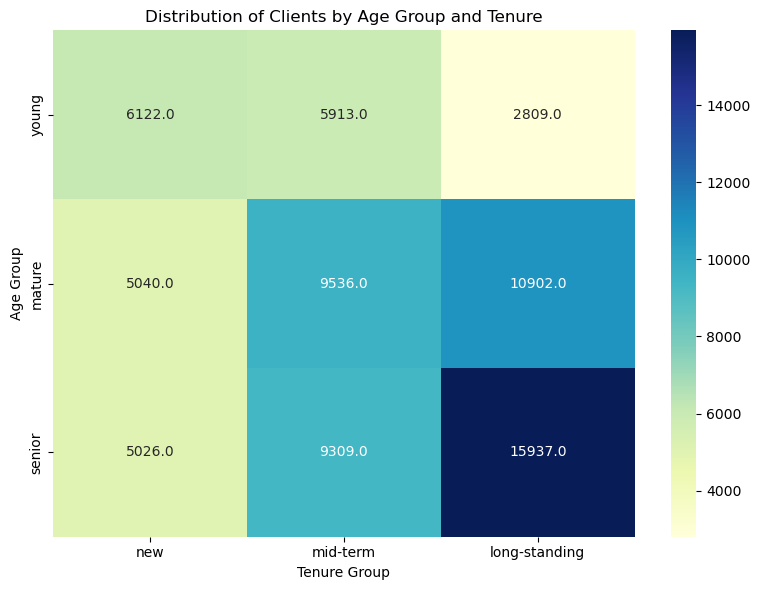

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Distribution of Clients by Age Group and Tenure')
plt.ylabel('Age Group')
plt.xlabel('Tenure Group')
plt.tight_layout()
plt.show()

In [106]:
print(demo['tenure_total_months'].describe())


count    70609.000000
mean       295.233639
std        164.548834
min        -13.000000
25%        154.000000
50%        268.000000
75%        384.000000
max       1493.000000
Name: tenure_total_months, dtype: float64


In [107]:
exp_clients = pd.read_csv('df_final_experiment_clients.txt')
exp_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [108]:
exp_clients.columns = [col.lower() for col in exp_clients.columns]
print(exp_clients.columns)

Index(['client_id', 'variation'], dtype='object')


In [109]:
exp_clients['variation'] = exp_clients['variation'].fillna('unknown')

# Display the DataFrame after cleaning
print("\nDataFrame after replacing NaN values in 'variation':")
print(exp_clients)


DataFrame after replacing NaN values in 'variation':
       client_id variation
0        9988021      Test
1        8320017      Test
2        4033851   Control
3        1982004      Test
4        9294070   Control
...          ...       ...
70604    2443347   unknown
70605    8788427   unknown
70606     266828   unknown
70607    1266421   unknown
70608    9895983   unknown

[70609 rows x 2 columns]


In [110]:
variation_counts = exp_clients['variation'].value_counts()

# Display the counts of unique values
print("\nCounts of unique values in 'variation' column:")
print(variation_counts)


Counts of unique values in 'variation' column:
variation
Test       26968
Control    23532
unknown    20109
Name: count, dtype: int64


In [111]:
exp_clients_duplicates = exp_clients.duplicated()
exp_clients_duplicates.sum()

0

In [112]:
print(exp_clients.isnull().sum())

client_id    0
variation    0
dtype: int64


In [113]:
exp_clients['variation'].unique()

array(['Test', 'Control', 'unknown'], dtype=object)

In [114]:
exp_clients.nunique()

client_id    70609
variation        3
dtype: int64

### **Merging the datasets**

In [115]:
df_final_web_data = pd.read_csv(r'/Users/helinozgekar/Downloads/merged_web_data.csv') 
df_final_web_data.head()

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [116]:
df_final_web_data["process_step"].value_counts()

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

In [117]:
df_final_web_data.shape

(755405, 6)

In [118]:
df_final_web_data

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...
755400,755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [119]:
df_final_web_data['date_time'] = pd.to_datetime(df_final_web_data['date_time'])


df_final_web_data['date'] = df_final_web_data['date_time'].dt.date
df_final_web_data['time'] = df_final_web_data['date_time'].dt.time

In [120]:
df_final_web_data

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,date,time
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22
3,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13
4,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04
...,...,...,...,...,...,...,...,...
755400,755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,2017-05-24,18:46:10
755401,755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,2017-05-24,18:45:29
755402,755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,2017-05-24,18:44:51
755403,755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,2017-05-24,18:44:34


In [121]:
df_web_data = df_final_web_data.drop('date_time', axis=1)

df_web_data

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date,time
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:27:07
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17,15:26:51
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:19:22
3,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17,15:19:13
4,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:18:04
...,...,...,...,...,...,...,...
755400,755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:46:10
755401,755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:45:29
755402,755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24,18:44:51
755403,755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:44:34


In [122]:
confirm_step = df_web_data[df_web_data["process_step"] == "confirm"]
confirm_step

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date,time
8,8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05,13:10:05
13,13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:29:03
14,14,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:29:01
15,15,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:28:52
24,24,1982004,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17,12:02:42
...,...,...,...,...,...,...,...
755362,755362,1462269,756274405_34153014475,903240226_7790404978_158729,confirm,2017-06-03,11:49:32
755368,755368,9563467,358754208_29929976792,898272434_72817818195_285148,confirm,2017-06-04,10:21:23
755375,755375,2443347,818414719_69544570654,148166449_67114410166_524360,confirm,2017-05-30,19:18:18
755376,755376,9895983,473024645_56027518531,498981662_93503779869_272484,confirm,2017-06-15,19:55:09


In [123]:
start_df = df_web_data[df_web_data["process_step"] == "start"]
start_df

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date,time
7,7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17,15:16:22
12,12,8320017,39393514_33118319366,960651974_70596002104_312201,start,2017-04-05,13:08:06
19,19,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05,12:24:04
28,28,1982004,618934751_10082078917,132494692_73738638511_70823,start,2017-04-17,11:59:42
29,29,9294070,489274391_63794562906,116640698_27328181095_188045,start,2017-04-17,11:16:28
...,...,...,...,...,...,...,...
755392,755392,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,19:02:04
755400,755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:46:10
755401,755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:45:29
755403,755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:44:34


In [124]:
exp_clients

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,unknown
70605,8788427,unknown
70606,266828,unknown
70607,1266421,unknown


In [125]:
exp_clients.tail(20)

,client_id,variation
70589,3431113,unknown
70590,8181596,unknown
70591,2030140,unknown
70592,5363779,unknown
70593,8927870,unknown
70594,9966171,unknown
70595,6182495,unknown
70596,5024641,unknown
70597,4410575,unknown
70598,3967304,unknown


In [126]:
exp_clients["variation"].value_counts()

variation
Test       26968
Control    23532
unknown    20109
Name: count, dtype: int64

In [127]:
26968+23532+20109

70609

In [128]:
merged_AB = pd.merge(df_web_data, exp_clients, on="client_id", how="left")
merged_AB

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date,time,variation
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:27:07,Test
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17,15:26:51,Test
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:19:22,Test
3,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17,15:19:13,Test
4,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:18:04,Test
...,...,...,...,...,...,...,...,...
755400,755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:46:10,NaN
755401,755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:45:29,NaN
755402,755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24,18:44:51,NaN
755403,755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:44:34,NaN


In [129]:
df_clean.head()

,client_id,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth,tenure_total_months,tenure_group,age_group
0,836976,6,73,60,undisclosed,2,45105,6,9,145,new,senior
1,2304905,7,94,58,undisclosed,2,110860,6,9,178,mid-term,senior
2,1439522,5,64,32,undisclosed,2,52468,6,9,124,new,mature
3,1562045,16,198,49,M,2,67455,3,6,390,long-standing,mature
4,5126305,12,145,33,F,2,103672,0,3,289,mid-term,mature


In [130]:
merged_age_AB = pd.merge(merged_AB, df_clean, on="client_id", how="left")
merged_age_AB

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date,time,variation,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth,tenure_total_months,tenure_group,age_group
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:27:07,Test,5.0,64.0,79.0,undisclosed,2.0,189024.0,1.0,4.0,124.0,new,senior
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17,15:26:51,Test,5.0,64.0,79.0,undisclosed,2.0,189024.0,1.0,4.0,124.0,new,senior
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:19:22,Test,5.0,64.0,79.0,undisclosed,2.0,189024.0,1.0,4.0,124.0,new,senior
3,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17,15:19:13,Test,5.0,64.0,79.0,undisclosed,2.0,189024.0,1.0,4.0,124.0,new,senior
4,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:18:04,Test,5.0,64.0,79.0,undisclosed,2.0,189024.0,1.0,4.0,124.0,new,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755400,755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755401,755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:45:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755402,755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24,18:44:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755403,755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:44:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
merged_age_AB.to_csv("all_data.csv")

In [132]:
all_data = merged_age_AB.copy()

Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. 


In [133]:
# Identify repeating steps for each visitor
all_data['is_repeating'] = all_data.duplicated(subset=['visitor_id', 'process_step'], keep=False)

# Filter rows where steps are repeating
repeating_steps = all_data[all_data['is_repeating']]

# Display repeating steps
print("\nRepeating Steps by Visitor:")
print(repeating_steps[['visitor_id', 'process_step']])


Repeating Steps by Visitor:
                  visitor_id process_step
0       580560515_7732621733       step_3
1       580560515_7732621733       step_2
2       580560515_7732621733       step_3
3       580560515_7732621733       step_2
4       580560515_7732621733       step_3
...                      ...          ...
755399  388766751_9038881013       step_1
755400  388766751_9038881013        start
755401  388766751_9038881013        start
755402  388766751_9038881013       step_1
755403  388766751_9038881013        start

[385150 rows x 2 columns]


It is possible that 71 152 visitor expirienced Error while doing the process since they had multiple repeating steps in the process.

In [134]:
# Identify repeating steps for each visitor
all_data['is_repeating'] = all_data.duplicated(subset=['visitor_id', 'process_step'], keep=False)

# Filter for repeating steps and retrieve unique visitor IDs
repeating_visitors = all_data[all_data['is_repeating']]['visitor_id'].unique()

# Count the number of unique visitors with repeating steps
num_repeating_visitors = len(repeating_visitors)

# Display the results
print("\nNumber of unique visitors with repeating steps:")
print(num_repeating_visitors)


Number of unique visitors with repeating steps:
71152


5. At which step do users drop off the most, and does this differ between test groups A and B?


In [135]:
all_data['step_order'] = all_data.groupby(['visitor_id', 'variation']).cumcount()

# Get the last step for each visitor
last_steps = all_data.loc[all_data.groupby(['visitor_id', 'variation'])['step_order'].idxmax()]

# Count occurrences of each step in last_steps by variation group
dropoff_counts = last_steps.groupby(['variation', 'process_step']).size().unstack(fill_value=0)

# Display the drop-off analysis
print("Drop-off Analysis by Test Group:")
print(dropoff_counts)

Drop-off Analysis by Test Group:
process_step  confirm  start  step_1  step_2  step_3
variation                                           
Control           666  25108     216      90     197
Test             2062  27305     215     107     230
unknown          1129  20879     192      65     190


Users drop of mostly already at start, combined 73 292 dropped off already at the beginig, where group A (control group) dropped off 25 108 times, and group B (test group) dropped 27 305 times which is sligtly more than group A. There is also 20 879 drop offs where is Unknown to which gruop did they belong.

6.Does the effect of the A/B test vary across age groups, device types, or other user characteristics?

Summary of Test Results by User Characteristic:
  variation age_group  total_calls  total_logons
0   Control     young      71224.0      135810.0
1   Control    mature     150767.0      299116.0
2   Control    senior     247787.0      470211.0
3      Test     young      81150.0      157472.0
4      Test    mature     175043.0      355108.0
5      Test    senior     313684.0      597808.0
6   unknown     young     114969.0      115489.0
7   unknown    mature     174357.0      175377.0
8   unknown    senior     258098.0      261348.0


/var/folders/28/m4664gg577953j4nbq5gvfy40000gn/T/ipykernel_17747/4246387999.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = all_data.groupby(['variation', 'age_group']).agg(


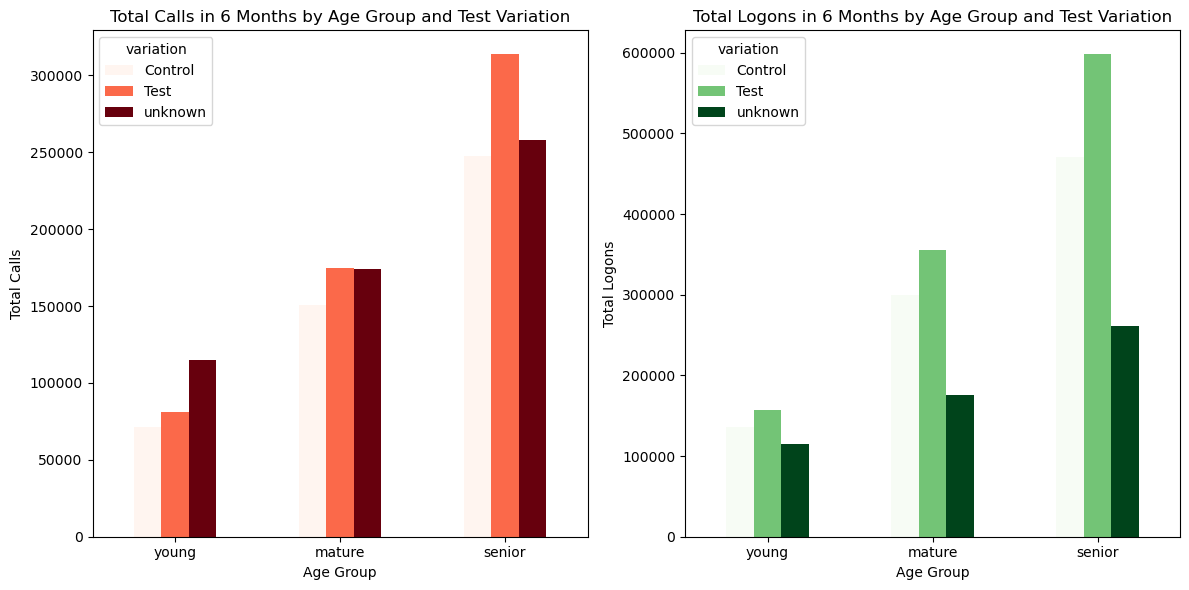

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define age group bins and labels
age_bins = [0, 30, 50, 100]
age_labels = ['young', 'mature', 'senior']
all_data['age_group'] = pd.cut(all_data['client_age'], bins=age_bins, labels=age_labels, right=False)

# Summarize data by variation and age group
summary = all_data.groupby(['variation', 'age_group']).agg(
    total_calls=('calls_6_mnth', 'sum'),
    total_logons=('logons_6_mnth', 'sum')
).reset_index()

# Display the summarized data for analysis
print("Summary of Test Results by User Characteristic:")
print(summary)

# Create bar plots for visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot total calls
summary.pivot(index='age_group', columns='variation', values='total_calls').plot(kind='bar', ax=ax[0], colormap='Reds')
ax[0].set_title('Total Calls in 6 Months by Age Group and Test Variation')
ax[0].set_xlabel('Age Group')
ax[0].set_ylabel('Total Calls')
ax[0].set_xticklabels(age_labels, rotation=0)

# Plot total logons
summary.pivot(index='age_group', columns='variation', values='total_logons').plot(kind='bar', ax=ax[1], colormap='Greens')
ax[1].set_title('Total Logons in 6 Months by Age Group and Test Variation')
ax[1].set_xlabel('Age Group')
ax[1].set_ylabel('Total Logons')
ax[1].set_xticklabels(age_labels, rotation=0)

plt.tight_layout()
plt.show()

## Question 1: Are customers who completed the process predominantly from a younger age group?

In [137]:
confirmed_step = merged_age_AB[merged_age_AB["process_step"] == "confirm"]
confirmed_step

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date,time,variation,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth,tenure_total_months,tenure_group,age_group
8,8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05,13:10:05,Test,22.0,274.0,34.0,M,2.0,36002.0,5.0,8.0,538.0,long-standing,mature
13,13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:29:03,Control,12.0,149.0,64.0,M,2.0,142642.0,5.0,8.0,293.0,mid-term,senior
14,14,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:29:01,Control,12.0,149.0,64.0,M,2.0,142642.0,5.0,8.0,293.0,mid-term,senior
15,15,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:28:52,Control,12.0,149.0,64.0,M,2.0,142642.0,5.0,8.0,293.0,mid-term,senior
24,24,1982004,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17,12:02:42,Test,6.0,80.0,44.0,undisclosed,2.0,30232.0,1.0,4.0,152.0,mid-term,mature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755362,755362,1462269,756274405_34153014475,903240226_7790404978_158729,confirm,2017-06-03,11:49:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755368,755368,9563467,358754208_29929976792,898272434_72817818195_285148,confirm,2017-06-04,10:21:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755375,755375,2443347,818414719_69544570654,148166449_67114410166_524360,confirm,2017-05-30,19:18:18,unknown,17.0,204.0,52.0,M,3.0,164693.0,7.0,7.0,408.0,long-standing,senior
755376,755376,9895983,473024645_56027518531,498981662_93503779869_272484,confirm,2017-06-15,19:55:09,unknown,10.0,121.0,49.0,M,2.0,97748.0,2.0,2.0,241.0,mid-term,mature


In [138]:
confirmed_step["age_group"].value_counts()

age_group
senior    26782
mature    21364
young     12397
Name: count, dtype: int64

In [139]:
duplicated_confirmed = confirmed_step[confirmed_step.duplicated(subset=['client_id'])]
duplicated_confirmed

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date,time,variation,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth,tenure_total_months,tenure_group,age_group
14,14,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:29:01,Control,12.0,149.0,64.0,M,2.0,142642.0,5.0,8.0,293.0,mid-term,senior
15,15,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:28:52,Control,12.0,149.0,64.0,M,2.0,142642.0,5.0,8.0,293.0,mid-term,senior
68,68,2519971,121616091_57089151674,428599802_30402877972_724989,confirm,2017-04-10,16:19:47,Test,11.0,143.0,66.0,F,2.0,68260.0,2.0,6.0,275.0,mid-term,senior
153,153,4507502,181973728_74713662041,854832377_30146752670_593738,confirm,2017-04-03,23:01:33,Test,5.0,70.0,30.0,undisclosed,2.0,51882.0,2.0,6.0,130.0,new,young
154,154,4507502,181973728_74713662041,854832377_30146752670_593738,confirm,2017-04-03,22:59:59,Test,5.0,70.0,30.0,undisclosed,2.0,51882.0,2.0,6.0,130.0,new,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755240,755240,4151008,198611158_15504600306,400796536_98072977798_567953,confirm,2017-05-28,11:33:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755241,755241,4151008,198611158_15504600306,400796536_98072977798_567953,confirm,2017-05-28,11:27:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755267,755267,3366069,873408030_95190752528,912911330_21403753699_164535,confirm,2017-06-04,17:18:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755335,755335,656469,213044511_44035482010,779376593_55768292727_9460,confirm,2017-06-02,16:39:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
cleaned_confirmed = confirmed_step.drop_duplicates(subset=['client_id'])
cleaned_confirmed

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date,time,variation,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth,tenure_total_months,tenure_group,age_group
8,8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05,13:10:05,Test,22.0,274.0,34.0,M,2.0,36002.0,5.0,8.0,538.0,long-standing,mature
13,13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:29:03,Control,12.0,149.0,64.0,M,2.0,142642.0,5.0,8.0,293.0,mid-term,senior
24,24,1982004,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17,12:02:42,Test,6.0,80.0,44.0,undisclosed,2.0,30232.0,1.0,4.0,152.0,mid-term,mature
37,37,3170143,837774974_91015515080,758001412_25057963943_219559,confirm,2017-04-04,18:41:44,Test,21.0,254.0,54.0,F,2.0,192110.0,6.0,9.0,506.0,long-standing,senior
42,42,6651403,387438258_49845138949,754106292_61370647593_160929,confirm,2017-04-04,17:38:39,Control,13.0,162.0,56.0,M,2.0,324713.0,4.0,7.0,318.0,long-standing,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755352,755352,5550882,711239091_44383102506,52940121_85165078104_706661,confirm,2017-06-07,17:22:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755362,755362,1462269,756274405_34153014475,903240226_7790404978_158729,confirm,2017-06-03,11:49:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755368,755368,9563467,358754208_29929976792,898272434_72817818195_285148,confirm,2017-06-04,10:21:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755376,755376,9895983,473024645_56027518531,498981662_93503779869_272484,confirm,2017-06-15,19:55:09,unknown,10.0,121.0,49.0,M,2.0,97748.0,2.0,2.0,241.0,mid-term,mature


In [141]:
by_age = cleaned_confirmed['age_group'].value_counts(normalize=True) * 100
by_age


age_group
senior    41.071840
mature    36.784063
young     22.144098
Name: proportion, dtype: float64

<Axes: title={'center': 'Distribution of clients that completed the process by age'}, xlabel='age_group'>

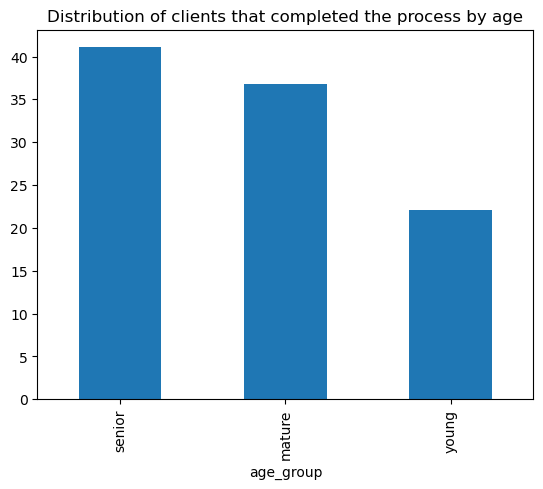

In [142]:
by_age.plot(kind="bar", title="Distribution of clients that completed the process by age")

## Question 7: Do returning users complete the process more often than new users?

In [143]:
df_user = all_data.groupby('visitor_id').agg({
    'visit_id': pd.Series.nunique,
    'client_id': 'first',
    'client_age': 'first',
    'gender': 'first',
    'process_step': 'max',
    'variation': 'first'
}).rename(columns={'visit_id': 'num_visits'})


In [144]:
df_user

,num_visits,client_id,client_age,gender,process_step,variation
visitor_id,,,,,,
100011869_84756704576,1,5867343,NaN,None,step_3,None
100019786_4272121951,1,6265388,42.0,undisclosed,step_3,Test
100026388_52569174348,1,2340487,31.0,undisclosed,step_3,Test
100048572_12752788846,1,3862688,NaN,None,start,None
100052114_10880025650,2,3273937,NaN,None,step_1,None
...,...,...,...,...,...,...
999986924_89514756905,7,598498,88.0,F,confirm,Test
999993887_42794242929,1,7732650,44.0,F,start,Control
999995931_60089148022,1,779389,48.0,F,step_3,Control


In [145]:
df_user['user_type'] = df_user['num_visits'].apply(lambda x: 'returning' if x > 1 else 'new')
df_user

,num_visits,client_id,client_age,gender,process_step,variation,user_type
visitor_id,,,,,,,
100011869_84756704576,1,5867343,NaN,None,step_3,None,new
100019786_4272121951,1,6265388,42.0,undisclosed,step_3,Test,new
100026388_52569174348,1,2340487,31.0,undisclosed,step_3,Test,new
100048572_12752788846,1,3862688,NaN,None,start,None,new
100052114_10880025650,2,3273937,NaN,None,step_1,None,returning
...,...,...,...,...,...,...,...
999986924_89514756905,7,598498,88.0,F,confirm,Test,returning
999993887_42794242929,1,7732650,44.0,F,start,Control,new
999995931_60089148022,1,779389,48.0,F,step_3,Control,new


In [146]:
# continuar esta questão

## Question 9: Is the winning variant statistically significant, or due to chance?

In [147]:
# Chi2 test

from scipy.stats import chi2_contingency

# Creating a contengency table
contingency = pd.crosstab(df_user['variation'], df_user['process_step'])

# Independency test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"P-value: {p}")


P-value: 1.1620998782124549e-206


In [148]:
df_user.dtypes


num_visits        int64
client_id         int64
client_age      float64
gender           object
process_step     object
variation        object
user_type        object
dtype: object

With this p-value we can confirm that there is a statistic differenc

Question 3: Which test group, A or B, achieved higher success in terms of users completing the full process?


*A* is a *control* group,
*B* is a *test* group

In [150]:
start_step = merged_age_AB[merged_age_AB["process_step"] == "start"]
start_step

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date,time,variation,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth,tenure_total_months,tenure_group,age_group
7,7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17,15:16:22,Test,5.0,64.0,79.0,undisclosed,2.0,189024.0,1.0,4.0,124.0,new,senior
12,12,8320017,39393514_33118319366,960651974_70596002104_312201,start,2017-04-05,13:08:06,Test,22.0,274.0,34.0,M,2.0,36002.0,5.0,8.0,538.0,long-standing,mature
19,19,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05,12:24:04,Control,12.0,149.0,64.0,M,2.0,142642.0,5.0,8.0,293.0,mid-term,senior
28,28,1982004,618934751_10082078917,132494692_73738638511_70823,start,2017-04-17,11:59:42,Test,6.0,80.0,44.0,undisclosed,2.0,30232.0,1.0,4.0,152.0,mid-term,mature
29,29,9294070,489274391_63794562906,116640698_27328181095_188045,start,2017-04-17,11:16:28,Control,5.0,70.0,29.0,undisclosed,2.0,34255.0,0.0,3.0,130.0,new,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755392,755392,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,19:02:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755400,755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755401,755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:45:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755403,755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:44:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
cleaned_start = start_step.drop_duplicates(subset=['client_id'])
cleaned_start

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date,time,variation,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth,tenure_total_months,tenure_group,age_group
7,7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17,15:16:22,Test,5.0,64.0,79.0,undisclosed,2.0,189024.0,1.0,4.0,124.0,new,senior
12,12,8320017,39393514_33118319366,960651974_70596002104_312201,start,2017-04-05,13:08:06,Test,22.0,274.0,34.0,M,2.0,36002.0,5.0,8.0,538.0,long-standing,mature
19,19,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05,12:24:04,Control,12.0,149.0,64.0,M,2.0,142642.0,5.0,8.0,293.0,mid-term,senior
28,28,1982004,618934751_10082078917,132494692_73738638511_70823,start,2017-04-17,11:59:42,Test,6.0,80.0,44.0,undisclosed,2.0,30232.0,1.0,4.0,152.0,mid-term,mature
29,29,9294070,489274391_63794562906,116640698_27328181095_188045,start,2017-04-17,11:16:28,Control,5.0,70.0,29.0,undisclosed,2.0,34255.0,0.0,3.0,130.0,new,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755373,755373,9563467,358754208_29929976792,898272434_72817818195_285148,start,2017-06-04,10:14:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755374,755374,9878184,776966655_24123118748,603596917_5015735635_745321,start,2017-06-12,19:48:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755380,755380,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15,19:50:00,unknown,10.0,121.0,49.0,M,2.0,97748.0,2.0,2.0,241.0,mid-term,mature
755392,755392,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,19:02:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
cleaned_start['variation'].value_counts()

variation
Test       26679
Control    23397
unknown    19938
Name: count, dtype: int64

In [149]:
cleaned_confirmed['variation'].value_counts()

variation
Test       18687
Control    15434
unknown    13679
Name: count, dtype: int64

In [159]:
start_count = [23397,26679]     # [Control, Test]
confirmed_count = [15434,18687]  # [Control, Test]

start_count = [int(s) for s in start_count]
confirmed_count = [int(t) for t in confirmed_count]

control_cr = start_count[0] / confirmed_count[0]
test_cr = start_count[1] / confirmed_count[1]

print(f"Control Conversion Rate: {control_cr:.4f}")
print(f"Test Conversion Rate:    {test_cr:.4f}")

Control Conversion Rate: 1.5159
Test Conversion Rate:    1.4277


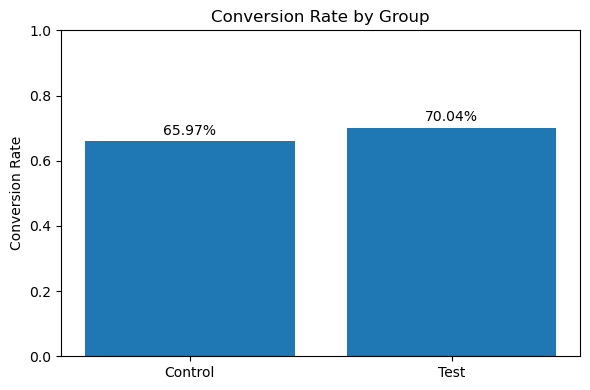

In [165]:
control_cr = 15434 / 23397
test_cr = 18687 / 26679

labels = ['Control', 'Test']
rates = [control_cr, test_cr]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, rates)

plt.ylim(0, 1)

plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.02,
             f"{height:.2%}",  # yüzde formatı
             ha='center')

plt.tight_layout()
plt.show()

Question 4: What is the average time to complete the process for each test group?

In [ ]:
start_times = (
    cleaned_start
    .assign(date_time=pd.to_datetime(cleaned_start['date'].astype(str) + ' ' + cleaned_start['time'].astype(str)))
    .groupby('client_id')['date_time']
    .min()
    .rename('start_time')
    .reset_index()
)

confirm_times = (
    cleaned_confirmed2
    .assign(date_time=pd.to_datetime(cleaned_confirmed2['date'].astype(str) + ' ' + cleaned_confirmed2['time'].astype(str)))
    .groupby('client_id')['date_time']
    .max()
    .rename('confirm_time')
    .reset_index()
)


duration_df = pd.merge(start_times, confirm_times, variation, on='client_id', how='inner')
duration_df['duration_minutes'] = (duration_df['confirm_time'] - duration_df['start_time']).dt.total_seconds() / 60



In [172]:
duration_df

,client_id,start_time,confirm_time,duration_minutes
0,169,2017-04-12 20:19:36,2017-04-12 20:23:09,3.550000
1,546,2017-06-17 10:03:29,2017-06-17 10:05:42,2.216667
2,555,2017-04-15 12:57:56,2017-04-15 13:00:34,2.633333
3,647,2017-04-12 15:41:28,2017-04-12 15:47:45,6.283333
4,722,2017-04-19 14:56:16,2017-04-19 15:00:09,3.883333
...,...,...,...,...
80080,9999451,2017-06-07 16:10:44,2017-06-07 16:13:32,2.800000
80081,9999729,2017-04-05 13:40:49,2017-05-08 16:09:40,47668.850000
80082,9999768,2017-06-03 18:11:24,2017-06-03 18:13:16,1.866667
80083,9999839,2017-03-29 12:11:32,2017-03-29 12:13:03,1.516667


In [175]:


variation_info = cleaned_confirmed2[['client_id', 'variation']].drop_duplicates()


merged = start_times.merge(confirm_times, on='client_id', how='inner')
merged = merged.merge(variation_info, on='client_id', how='left')


merged['duration_minutes'] = (merged['confirm_time'] - merged['start_time']).dt.total_seconds() / 60


result = merged.groupby('variation')['duration_minutes'].mean().reset_index()

print(result)


  variation  duration_minutes
0   Control       4495.984483
1      Test       3601.187514
2   unknown       4189.669822
